# Regression models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

# Set display option to show all columns
pd.set_option('display.max_columns', None)

# Get rid of FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Import the data set
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df['cut'].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [4]:
df['color'].unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [5]:
df['clarity'].unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

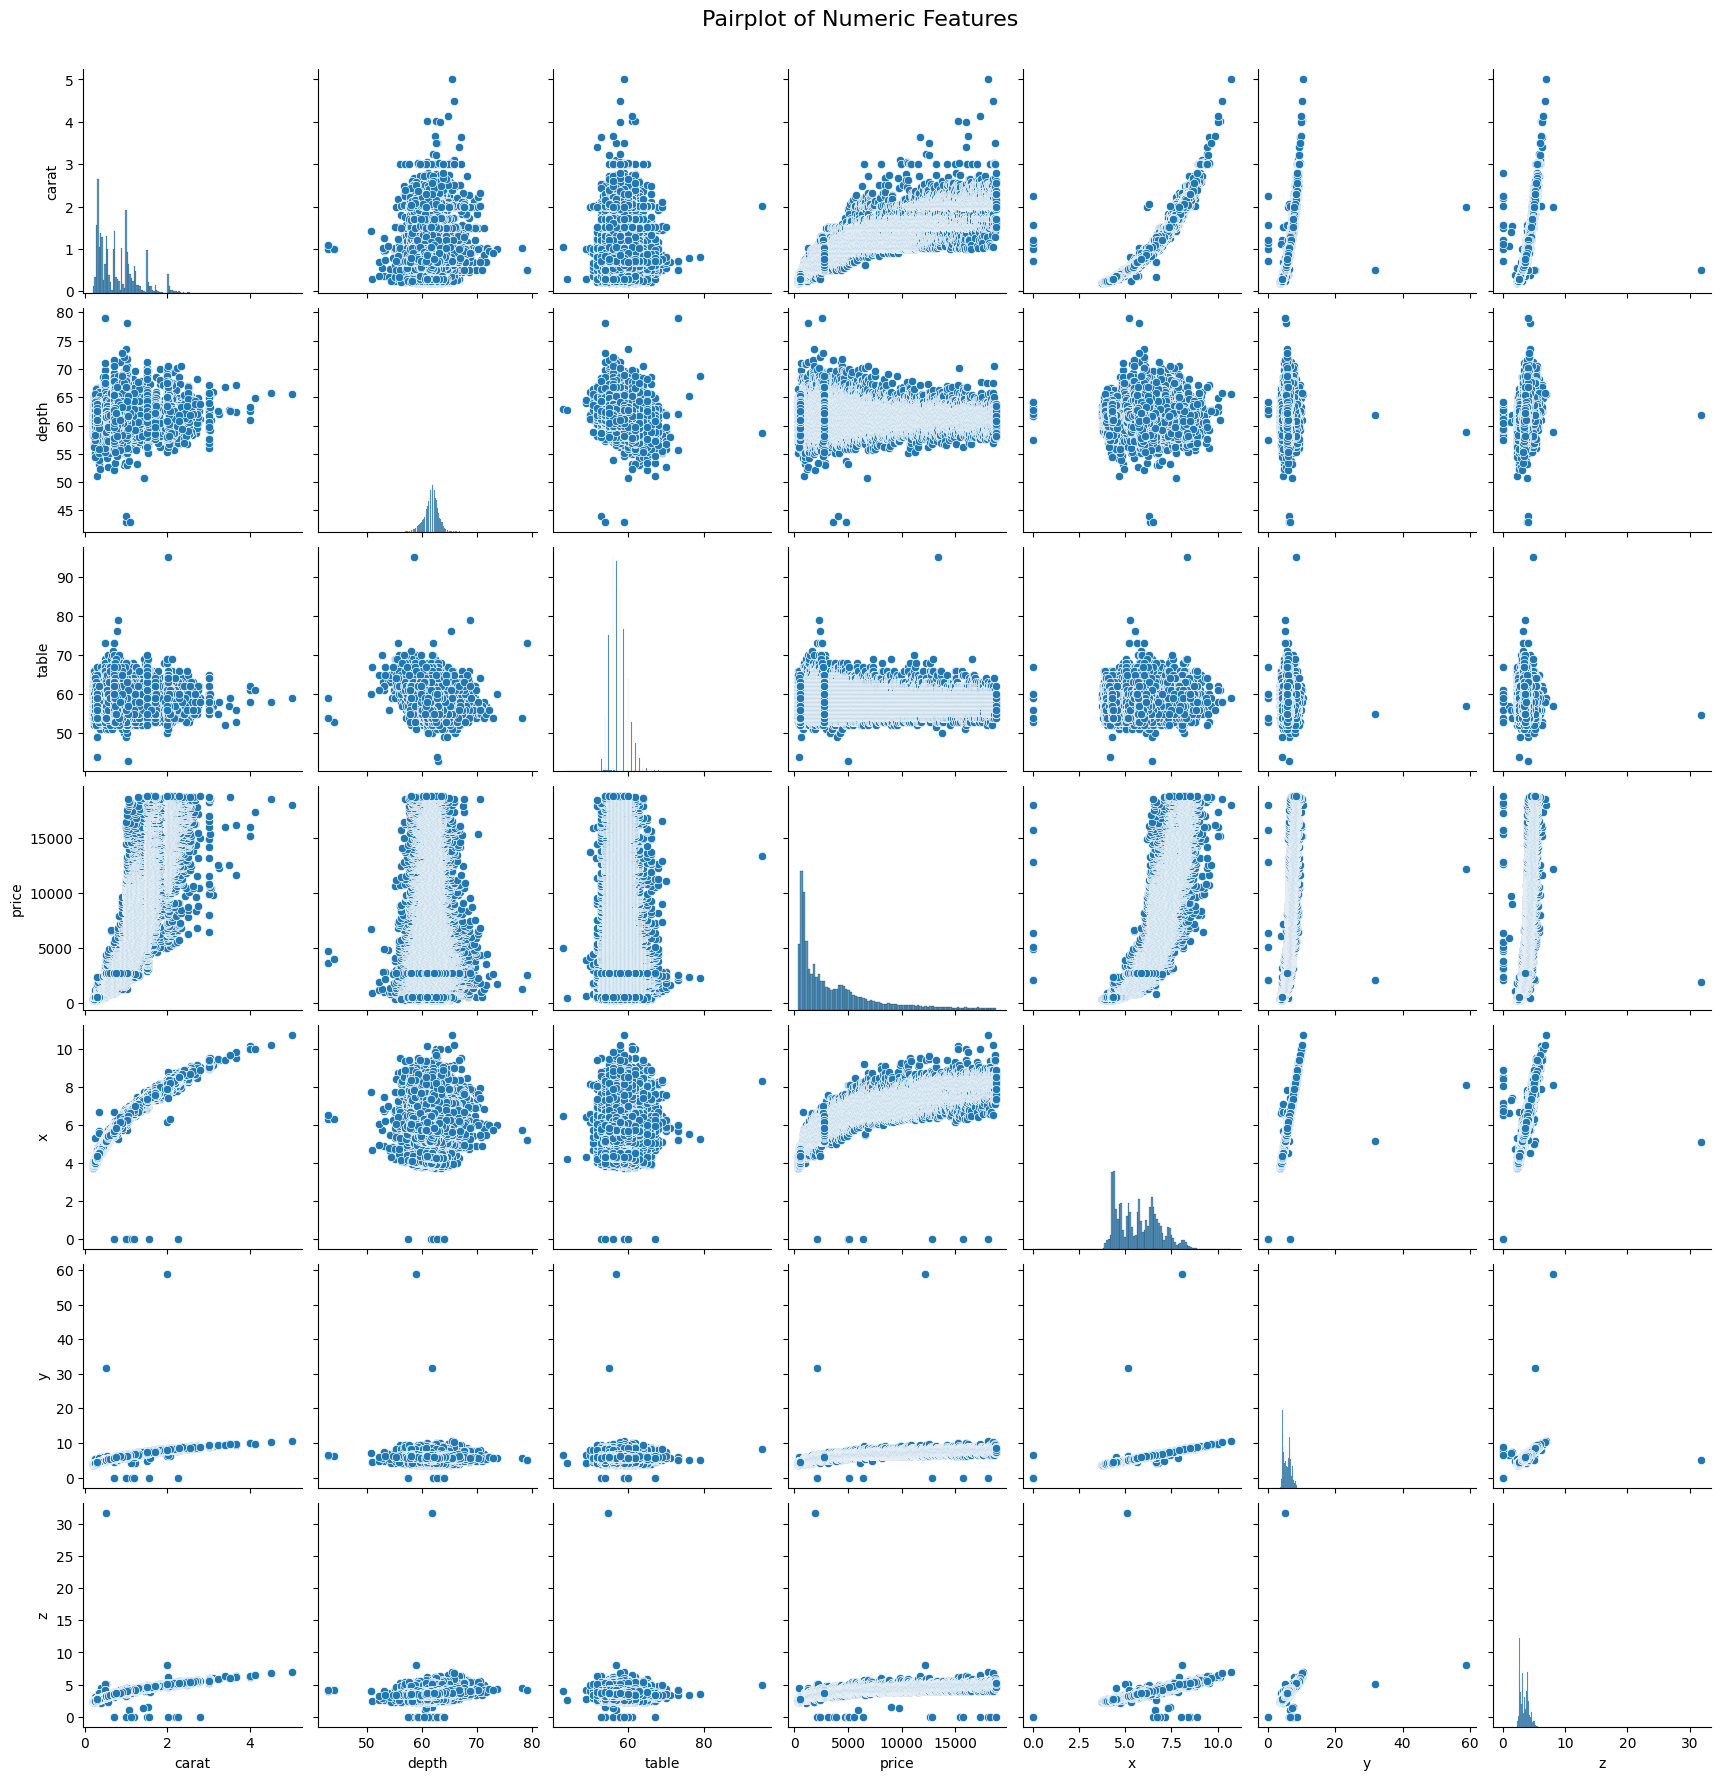

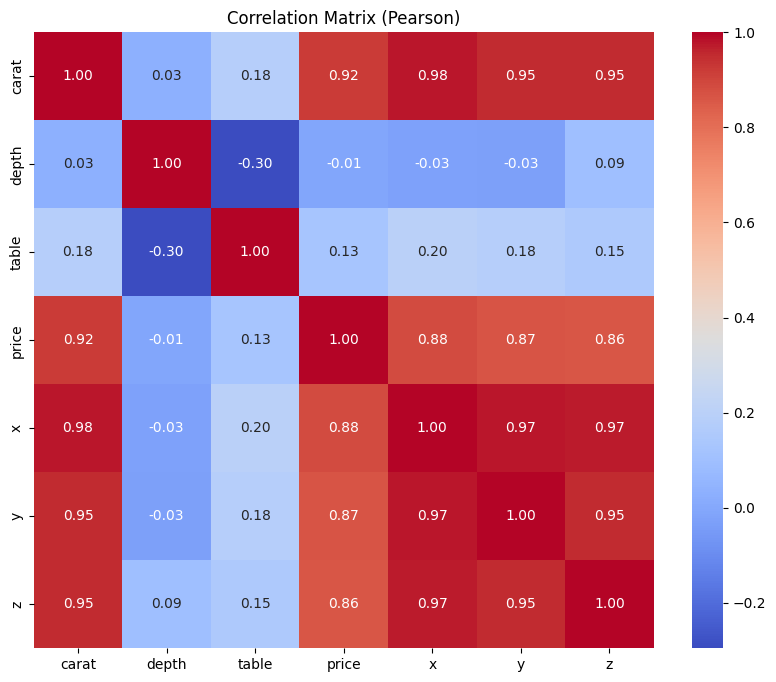

In [6]:
# Selecting only numeric columns
df_numeric = df.select_dtypes(include='number')

# Create a pairplot for the numeric DataFrame
sns.pairplot(df_numeric, diag_kind="hist")  # `diag_kind="hist"` uses histograms for diagonal plots
plt.suptitle('Pairplot of Numeric Features', y=1.02, fontsize=16)
plt.show()

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Visualize the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Pearson)')
plt.show()

In [7]:
# Split the data into features and target
X = df_numeric.drop(columns='price')
y = df_numeric['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize numeric variables
    ('regressor', LinearRegression()) 
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'LinearRegression RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'LinearRegression MAE: {mae}')

# Compute R-squared
r2 = r2_score(y_test, y_pred)
print(f'LinearRegression R-squared: {r2}')

# Compute MSE
mse = mean_squared_error(y_test, y_pred)
print(f'LinearRegression MSE: {mse}')

LinearRegression RMSE: 1497.3906985438496
LinearRegression MAE: 888.4808633901852
LinearRegression R-squared: 0.8589542625888916
LinearRegression MSE: 2242178.904085638


In [8]:
# Create a pipeline with DummyRegressor
dummy_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize numeric variables
    ('regressor', DummyRegressor(strategy='mean'))  # Use mean strategy for DummyRegressor
])

# Train the DummyRegressor pipeline
dummy_pipeline.fit(X_train, y_train)

# Make predictions with DummyRegressor
y_dummy_pred = dummy_pipeline.predict(X_test)

# Compute RMSE for DummyRegressor
dummy_rmse = mean_squared_error(y_test, y_dummy_pred, squared=False)
print(f'Dummy RMSE: {dummy_rmse}')

# Compute MAE for DummyRegressor
dummy_mae = mean_absolute_error(y_test, y_dummy_pred)
print(f'Dummy MAE: {dummy_mae}')

# Compute R-squared for DummyRegressor
dummy_r2 = r2_score(y_test, y_dummy_pred)
print(f'Dummy R-squared: {dummy_r2}')

# Compute MSE for DummyRegressor
dummy_mse = mean_squared_error(y_test, y_dummy_pred)
print(f'Dummy MSE: {dummy_mse}')

Dummy RMSE: 3987.2221763258735
Dummy MAE: 3020.5058390529985
Dummy R-squared: -7.04060323410971e-05
Dummy MSE: 15897940.683384834


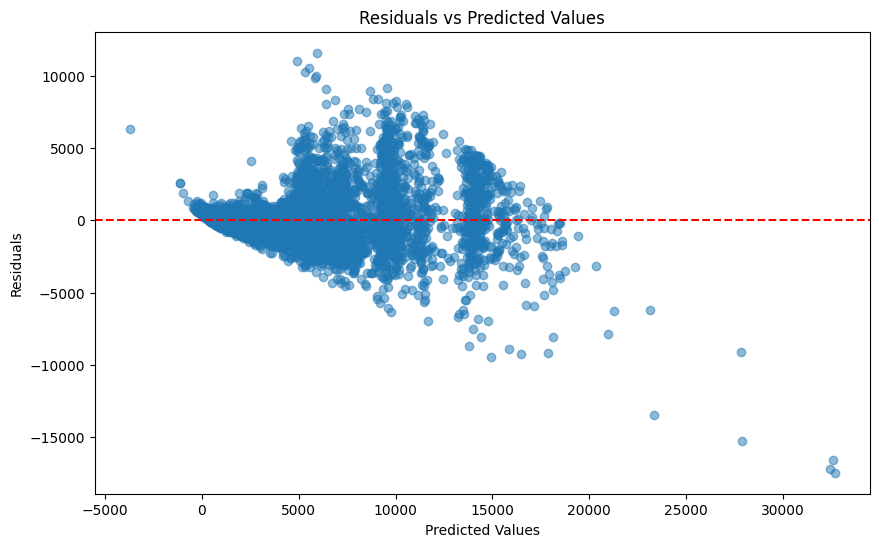

In [9]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()